<a href="https://colab.research.google.com/github/D1EGO-R0JAS/Lineal_Regresion_P/blob/main/Proyecto_Regresion_Lineal_Platzi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Este es un proyecto de Cargos o cosotos de pacientes segun el siguiente dataset**
https://www.kaggle.com/datasets/mirichoi0218/insurance

Lo priemero que haremos sera importar las librerias necesarias y despues cargamos los datos.

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Aqui vemos que el sexo  y el smoke es categorico y lo podemos pasar a binario usando replace, como se ve a continuación y ademas sacaremos una copia a nuestro dataframe con la funcion de copy():

In [224]:
df2 = df.copy()

In [225]:
df2['sex'].replace(to_replace={'male':1, 'female':0},inplace=True)
df2['smoker'].replace(to_replace={'yes':1, 'no':0},inplace=True)

In [226]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [227]:
list(np.unique(df2.region))

['northeast', 'northwest', 'southeast', 'southwest']

In [228]:
df2 = pd.get_dummies(df2)
df2.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [229]:
df2.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [230]:
df2.drop_duplicates(inplace=True)

In [231]:
df2.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<Axes: >

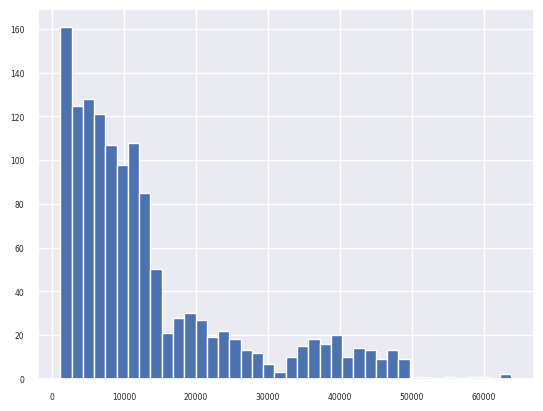

In [232]:
df2.charges.hist(bins=40)

In [233]:
df2[df2.charges>50000]
df2 = df2[df2.charges<50000]

<Axes: >

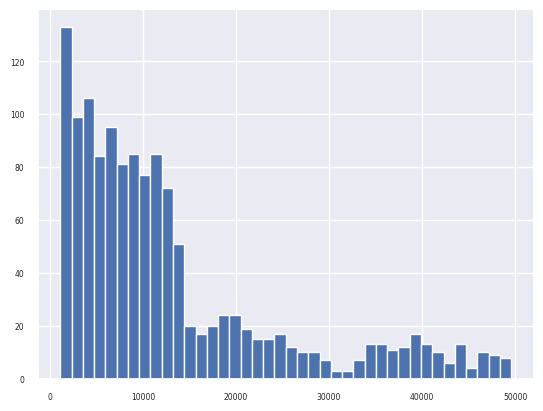

In [234]:
df2.charges.hist(bins=40)

Despues de haber dejado los datos en manera numerica ahora prodecemos a graficar para entender un poco mas la correlacion de las variables y si hay multicolinialidad.

<Axes: >

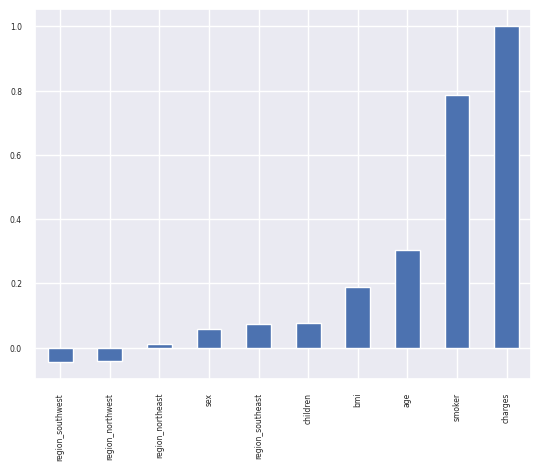

In [235]:
df2.corr()['charges'].sort_values(ascending=True).plot(kind='bar')

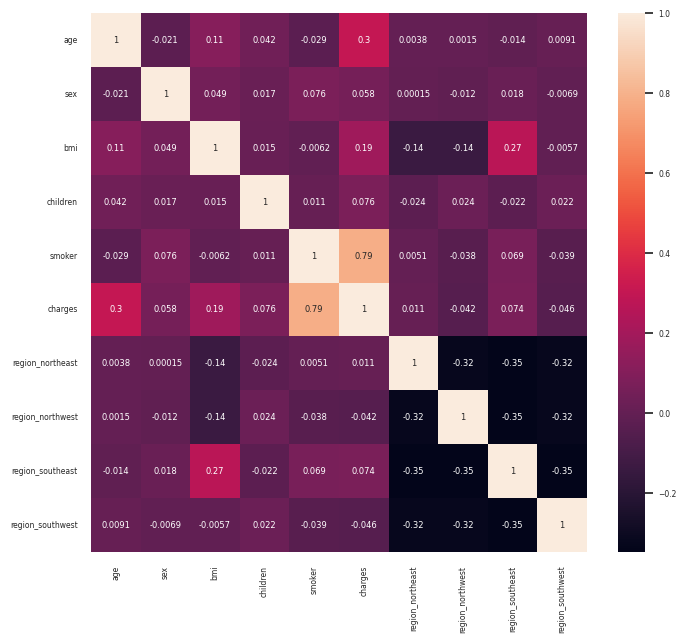

In [236]:
fig = plt.figure(figsize=(8,7))
sns.heatmap(df2.corr(), annot=True)
sns.set(font_scale=0.5)
plt.show()

Ahora procedemos a crear nuestro modelo de regresion lineal multiple.

In [247]:
X1 = df2.drop(['charges','sex'], axis=1)
y1 = df2['charges'].values.reshape(-1,1)

In [248]:
x1_train, x1_test, y1_train, y1_test  = train_test_split(x1, y1, test_size=0.2, random_state=42)

sc_x1 = StandardScaler().fit(x1)
sc_y1 = StandardScaler().fit(y1)

x1_train = sc_x1.transform(x1_train)
x1_test = sc_x1.transform(x1_test)
y1_train = sc_y1.transform(y1_train)
y1_test = sc_y1.transform(y1_test)

lrm = LinearRegression()
lrm.fit(x1_train,y1_train)

y_pred1 = lrm.predict(x1_test)

In [249]:
lrm.score(x1_test, y1_test)

0.7272198542676911

In [250]:
import sklearn.metrics as metrics
r2 = metrics.r2_score(y1_test, y_pred1)
mse = metrics.mean_squared_error(y1_test, y_pred1)
print(r2)
print(mse)

0.7272198542676911
0.28060344389238595


In [238]:
import sklearn.metrics as metrics
r2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
print(r2)
print(mse)

0.7440136387746281
0.2715537665673393


In [215]:
import statsmodels.api as sm
import pandas as pd

# Supongamos que df es tu DataFrame con las columnas x1, x2, etc.
# Ajusta las siguientes líneas según tu configuración de datos
X1 = df2.drop(['charges','sex'], axis=1)
y1 = df2['charges']

# Agrega una columna de unos para el término de intercepción
X_with_intercept = sm.add_constant(X1)

# Nombres de las columnas para el resumen del modelo
col_names = ['const'] + list(X1.columns)

# Crea el modelo de regresión lineal con nombres de columnas
model_sm = sm.OLS(y1, X_with_intercept)

# Ajusta el modelo
results = model_sm.fit()

# Configura los nombres de las columnas para el resumen
results.params.index = col_names

# Imprime el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     574.8
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:54:19   Log-Likelihood:                -13416.
No. Observations:                1330   AIC:                         2.685e+04
Df Residuals:                    1322   BIC:                         2.689e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9544.8070    748.570  

In [251]:
df3 = df2.copy()
df3['overweight'] = (df3.bmi>=30).astype(int)
df3['overweight&smoker'] = df3.overweight * df3.smoker
df3.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,overweight,overweight&smoker
0,19,0,27.900,0,1,16884.92400,0,0,0,1,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0,0,0


In [270]:
x2 = df3.drop(['charges','region_northeast','region_northwest'], axis=1)
y2 = df3['charges'].values.reshape(-1,1)

In [271]:
x2_train, x2_test, y2_train, y2_test  = train_test_split(x2, y2, test_size=0.2, random_state=42)

sc_x2 = StandardScaler().fit(x2)
sc_y2 = StandardScaler().fit(y2)

x2_train = sc_x2.transform(x2_train)
x2_test = sc_x2.transform(x2_test)
y2_train = sc_y2.transform(y2_train)
y2_test = sc_y2.transform(y2_test)

lrm = LinearRegression()
lrm.fit(x2_train,y2_train)

LinearRegression()

In [272]:
y_pred2 = lrm.predict(x2_test)

In [273]:
lrm.score(x2_test, y2_test)

0.8623996466298299

In [274]:
import sklearn.metrics as metrics
r2 = metrics.r2_score(y2_test, y_pred2)
mse = metrics.mean_squared_error(y2_test, y_pred2)
print(r2)
print(mse)

0.8623996466298299
0.14154671313347628


In [275]:
import statsmodels.api as sm

# Supongamos que df es tu DataFrame con las columnas x1, x2, etc.
# Ajusta las siguientes líneas según tu configuración de datos
X1 = df3.drop(['charges','region_northeast','region_northwest'], axis=1)
y1 = df3['charges']

# Agrega una columna de unos para el término de intercepción
X_with_intercept = sm.add_constant(X1)

# Nombres de las columnas para el resumen del modelo
col_names = ['const'] + list(X1.columns)

# Crea el modelo de regresión lineal con nombres de columnas
model_sm = sm.OLS(y1, X_with_intercept)

# Ajusta el modelo
results = model_sm.fit()

# Configura los nombres de las columnas para el resumen
results.params.index = col_names

# Imprime el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     924.3
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:25:30   Log-Likelihood:                -13023.
No. Observations:                1330   AIC:                         2.607e+04
Df Residuals:                    1320   BIC:                         2.612e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4682.0045    916.81

In [281]:
# Valores de ejemplo para las variables independientes
edad_ejemplo = 30
sexo = 1
bmi_ejemplo = 25.0
children_ejemplo = 2
smoker_ejemplo = 0  # 0 para no fumador, 1 para fumador
region_southeast_ejemplo = 1  # Puedes ajustar según tu región de interés
region_southwest_ejemplo = 0
overweight = 0
overweight_smoker = 0

# Escalar los valores de ejemplo
valores_ejemplo_escalados = sc_x2.transform([[edad_ejemplo, sexo ,bmi_ejemplo, children_ejemplo, smoker_ejemplo,
                                               region_southeast_ejemplo, region_southwest_ejemplo,
                                               overweight, overweight]])

# Realizar la predicción con el modelo
prediccion_escalada = lrm.predict(valores_ejemplo_escalados)

# Desescalar la predicción para obtener el valor real de cargos (charges)
prediccion_desescalada = sc_y2.inverse_transform(prediccion_escalada)

# Imprimir la predicción
print(f'Predicción de Cargos (Charges): {prediccion_desescalada[0][0]}')


Predicción de Cargos (Charges): 5757.564129688229


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
